In [142]:
#utilities 
import re 
import numpy as np
import pandas as pd

In [143]:
# plotting
import seaborn as sns
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [144]:
# Natural Learning Processing Kit
#Lemmatization is the process of grouping together the different inflected forms of a word so they can be analyzed as a single item.
#Lemmatization is similar to stemming but it brings context to the words. 
#So it links words with similar meanings to one word.
from nltk.stem import WordNetLemmatizer

In [145]:
# sklearn free software machine learning library
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import BernoulliNB
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import confusion_matrix, classification_report

In [146]:
# Importing the dataset
DATASET_COLUMNS=['target','text']
DATASET_ENCODING = "ISO-8859-1"
df = pd.read_csv('new_dataset_check2.csv', encoding=DATASET_ENCODING, names=DATASET_COLUMNS)
df.sample(5)

,target,text
1777,positive,"Vaahto Pulp & Paper , of Finnish Vaahto Group ..."
641,positive,26 January 2011 - Finnish metal products compa...
3323,neutral,The platen edges in contact with the band are ...
2490,neutral,Iso Omena is based in the Matinkyla district o...
2758,neutral,The Finnish investment company Sponda is condu...


In [147]:
#Exploratory Data Analysis  
#Five top records of data
df.head()

,target,text
0,neutral,"According to Gran , the company has no plans t..."
1,neutral,Technopolis plans to develop in stages an area...
2,negative,The international electronic industry company ...
3,positive,With the new production plant the company woul...
4,positive,According to the company 's updated strategy f...


In [148]:
#Columns/features in data
df.columns
# target: the polarity of the tweet (positive or negative)
# ids: Unique id of the tweet
# date: the date of the tweet
# flag: It refers to the query. If no such query exists then it is NO QUERY.
# user: It refers to the name of the user that tweeted
# text: It refers to the text of the tweet


Index(['target', 'text'], dtype='object')

In [149]:
#Length of the dataset
print('length of data is', len(df))

length of data is 4846


In [150]:
#Shape of data
df.shape

(4846, 2)

In [151]:
#Data information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4846 entries, 0 to 4845
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   target  4846 non-null   object
 1   text    4846 non-null   object
dtypes: object(2)
memory usage: 75.8+ KB


In [152]:
#Data types of all the columns
df.dtypes


target    object
text      object
dtype: object

In [153]:
#Checking for Null values 
np.sum(df.isnull().any(axis=1))

0

In [154]:
#Rows and columns in the dataset
print('Count of columns in the data is:  ', len(df.columns))
print('Count of rows in the data is:  ', len(df))

Count of columns in the data is:   2
Count of rows in the data is:   4846


In [155]:
#Check unique Target Values
df['target'].unique()

array(['neutral', 'negative', 'positive'], dtype=object)

In [156]:
#Check the number of unique Target Values
df['target'].nunique()

3

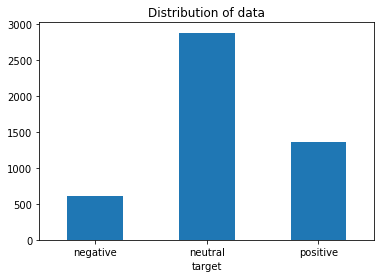

In [157]:
#Data Visualization of Target Variables 
# Plotting the distribution for dataset.
ax = df.groupby('target').count().plot(kind='bar', title='Distribution of data',legend=False)
ax.set_xticklabels(['negative','neutral', 'positive'], rotation=0)
# Storing data in lists.
text, sentiment = list(df['text']), list(df['target'])

<AxesSubplot:xlabel='target', ylabel='count'>

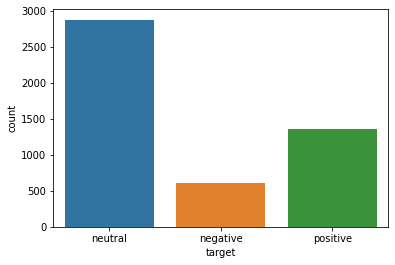

In [158]:
import seaborn as sns
sns.countplot(x='target', data=df)

###  Data Preprocessing 
In the above-given problem statement before training the model, 
we have performed various pre-processing steps on the dataset that mainly dealt with removing stopwords, 
removing emojis. The text document is then converted into the lowercase for better generalization.

Subsequently, the punctuations were cleaned and removed thereby reducing the unnecessary noise from the dataset.
After that, we have also removed the repeating characters from the words along with removing the URLs as they do not 
have any significant importance.

At last, we then performed Stemming(reducing the words to their derived stems) and 
Lemmatization(reducing the derived words to their root form known as lemma) for better results.

In [159]:
# Selecting the text and Target column for our further analysis
data=df[['text','target']]

In [160]:
# Replacing the values to ease understanding. 
data['target'] = data['target'].replace('negative',0)
data['target'] = data['target'].replace('positive',1)
data['target'] = data['target'].replace('neutral',2)

In [161]:
# Print unique values of target variables
data['target'].unique()

array([2, 0, 1], dtype=int64)

In [162]:
# Separating positive and negative tweets
data_pos = data[data['target'] == 1]
data_neg = data[data['target'] == 0]
data_neutral = data[data['target'] == 2]

In [163]:
# taking one fourth data so we can run on our machine easily
data_pos = data_pos.iloc[:int(1000)]
data_neg = data_neg.iloc[:int(1000)]
data_neutral = data_neutral.iloc[:int(1000)]

In [164]:
# Combining positive and negative tweets
dataset = pd.concat([data_pos, data_neg, data_neutral ])

In [165]:
# Making statement text in lower case
dataset['text']=dataset['text'].str.lower()
dataset['text'].tail()

2208    the company expects sales revenue of rmb8 .0 b...
2210    the company has exported into about twenty eur...
2213    the company 's net sales in 2009 totalled meur...
2214    the company 's operating profit for 2006 stood...
2215           the company 's profit totaled ls 134,700 .
Name: text, dtype: object

In [166]:
#Defining set containing all stopwords in English.

stopwordlist = ['a', 'about', 'above', 'after', 'again', 'ain', 'all', 'am', 'an',
             'and','any','are', 'as', 'at', 'be', 'because', 'been', 'before',
             'being', 'below', 'between','both', 'by', 'can', 'd', 'did', 'do',
             'does', 'doing', 'down', 'during', 'each','few', 'for', 'from',
             'further', 'had', 'has', 'have', 'having', 'he', 'her', 'here',
             'hers', 'herself', 'him', 'himself', 'his', 'how', 'i', 'if', 'in',
             'into','is', 'it', 'its', 'itself', 'just', 'll', 'm', 'ma',
             'me', 'more', 'most','my', 'myself', 'now', 'o', 'of', 'on', 'once',
             'only', 'or', 'other', 'our', 'ours','ourselves', 'out', 'own', 're','s', 'same', 'she', "shes", 'should', "shouldve",'so', 'some', 'such',
             't', 'than', 'that', "thatll", 'the', 'their', 'theirs', 'them',
             'themselves', 'then', 'there', 'these', 'they', 'this', 'those',
             'through', 'to', 'too','under', 'until', 'up', 've', 'very', 'was',
             'we', 'were', 'what', 'when', 'where','which','while', 'who', 'whom',
             'why', 'will', 'with', 'won', 'y', 'you', "youd","youll", "youre",
             "youve", 'your', 'yours', 'yourself', 'yourselves']

In [167]:
# Cleaning and removing the above stop words list from the tweet text
STOPWORDS = set(stopwordlist)
def cleaning_stopwords(text):
    return " ".join([word for word in str(text).split() if word not in STOPWORDS])
dataset['text'] = dataset['text'].apply(lambda text: cleaning_stopwords(text))
dataset['text'].head()

3    new production plant company would increase ca...
4    according company 's updated strategy years 20...
5    financing aspocomp 's growth aspocomp aggressi...
6    last quarter 2010 , componenta 's net sales do...
7    third quarter 2010 , net sales increased 5.2 %...
Name: text, dtype: object

In [168]:
# Cleaning and removing punctuations
import string
english_punctuations = string.punctuation
punctuations_list = english_punctuations
def cleaning_punctuations(text):
    translator = str.maketrans('', '', punctuations_list)
    return text.translate(translator)
dataset['text']= dataset['text'].apply(lambda x: cleaning_punctuations(x))
dataset['text'].tail()


2208    company expects sales revenue rmb8 0 billion 2...
2210    company exported twenty european countries wel...
2213    company s net sales 2009 totalled meur 3078 op...
2214    company s operating profit 2006 stood 396 mln ...
2215                  company s profit totaled ls 134700 
Name: text, dtype: object

In [169]:
# Cleaning and removing repeating characters
def cleaning_repeating_char(text):
    return re.sub(r'(.)1+', r'1', text)
dataset['text'] = dataset['text'].apply(lambda x: cleaning_repeating_char(x))
dataset['text'].tail()

2208    company expects sales revenue rmb8 0 billion 2...
2210    company exported twenty european countries wel...
2213    company s net sales 2009 totalled meur 3078 op...
2214    company s operating profit 2006 stood 396 mln ...
2215                   company s profit totaled ls134700 
Name: text, dtype: object

In [170]:
# Cleaning and removing URL’s
def cleaning_URLs(data):
    return re.sub('((www.[^s]+)|(https?://[^s]+))',' ',data)
dataset['text'] = dataset['text'].apply(lambda x: cleaning_URLs(x))
dataset['text'].tail()

2208    company expects sales revenue rmb8 0 billion 2...
2210    company exported twenty european countries wel...
2213    company s net sales 2009 totalled meur 3078 op...
2214    company s operating profit 2006 stood 396 mln ...
2215                   company s profit totaled ls134700 
Name: text, dtype: object

In [171]:
#  Cleaning and removing Numeric numbers
def cleaning_numbers(data):
    return re.sub('[0-9]+', '', data)
dataset['text'] = dataset['text'].apply(lambda x: cleaning_numbers(x))
dataset['text'].tail()

2208         company expects sales revenue rmb  billion  
2210    company exported twenty european countries wel...
2213    company s net sales  totalled meur  operating ...
2214    company s operating profit  stood  mln euro   ...
2215                         company s profit totaled ls 
Name: text, dtype: object

In [172]:
# Getting tokenization of tweet text

# Tokenization is the process of dividing text into a set of meaningful pieces. These pieces are called tokens. 
# For example, we can divide a chunk of text into words, or we can divide it into sentences.
from nltk.tokenize import RegexpTokenizer
tokenizer = RegexpTokenizer(r"[\w']+")
dataset['text'] = dataset['text'].apply(tokenizer.tokenize)
dataset['text'].head()

3    [new, production, plant, company, would, incre...
4    [according, company, s, updated, strategy, yea...
5    [financing, aspocomp, s, growth, aspocomp, agg...
6    [last, quarter, componenta, s, net, sales, dou...
7    [third, quarter, net, sales, increased, eur, m...
Name: text, dtype: object

### Applying Stemming

In [173]:
# Stemming is a technique used to extract the base form of the words by removing affixes from them. 
# It is just like cutting down the branches of a tree to its stems.
#  For example, the stem of the words eating, eats, eaten is eat.

import nltk
st = nltk.PorterStemmer()
def stemming_on_text(data):
    text = [st.stem(word) for word in data]
    return data
dataset['text']= dataset['text'].apply(lambda x: stemming_on_text(x))
dataset['text'].head()

3    [new, production, plant, company, would, incre...
4    [according, company, s, updated, strategy, yea...
5    [financing, aspocomp, s, growth, aspocomp, agg...
6    [last, quarter, componenta, s, net, sales, dou...
7    [third, quarter, net, sales, increased, eur, m...
Name: text, dtype: object

### Applying Lemmatization

In [174]:
# Lemmatization is the process of grouping together the different inflected forms of a word so they can be analyzed 
# as a single item. Lemmatization is similar to stemming but it brings context to the words. So it links words with 
# similar meanings to one word. 

import nltk
nltk.download('wordnet')
nltk.download('omw-1.4')
# nltk.download()

lm = nltk.WordNetLemmatizer()
def lemmatizer_on_text(data):
    text = [lm.lemmatize(word) for word in data]
    return data
dataset['text'] = dataset['text'].apply(lambda x: lemmatizer_on_text(x))
dataset['text'].head()

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Diya\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\Diya\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


3    [new, production, plant, company, would, incre...
4    [according, company, s, updated, strategy, yea...
5    [financing, aspocomp, s, growth, aspocomp, agg...
6    [last, quarter, componenta, s, net, sales, dou...
7    [third, quarter, net, sales, increased, eur, m...
Name: text, dtype: object

### Separating input feature and label

In [175]:
# Briefly, feature is input; label is output. 
# This applies to both classification and regression problems.

# A feature is one column of the data in your input set. 
# For instance, if you're trying to predict the type of pet someone will choose, your input features might include age, 
# home region, family income, etc. The label is the final choice, such as dog, fish, iguana, rock, etc.

# since you've trained your model, you will give it sets of new input containing those features;
# it will return the predicted "label" (pet type) for that person.

X=data.text
y=data.target

### Plot a cloud of words for negative tweets

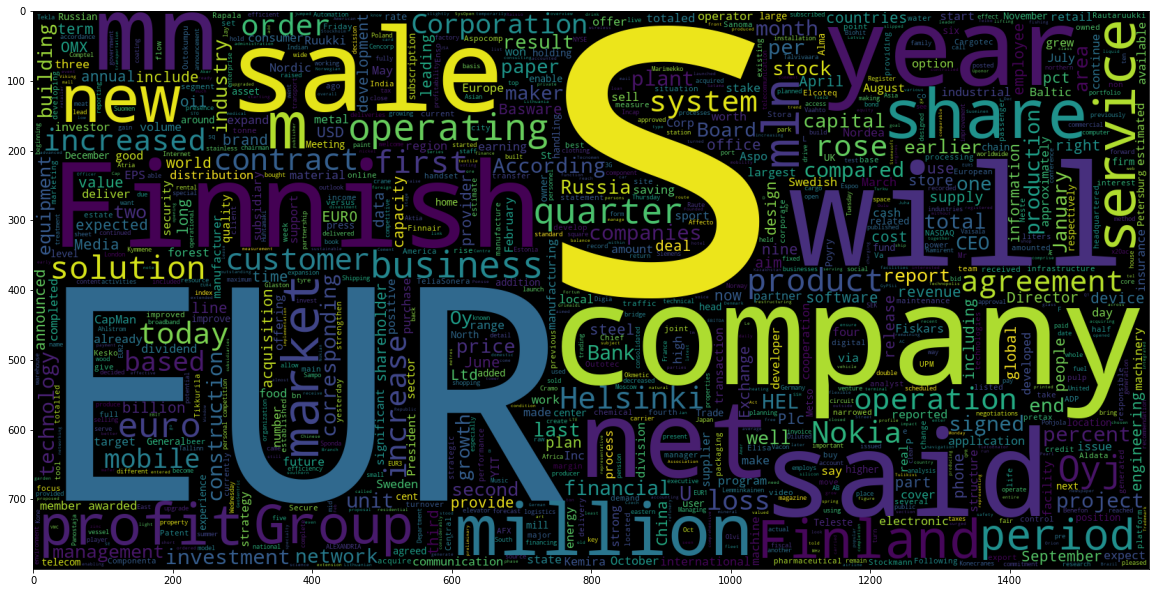

In [178]:
data_neg = data['text'][:2846]
plt.figure(figsize = (20,20))
wc = WordCloud(max_words = 1000 , width = 1600 , height = 800,
               collocations=False).generate(" ".join(data_neg))
plt.imshow(wc)

### Plot a cloud of words for positive tweets

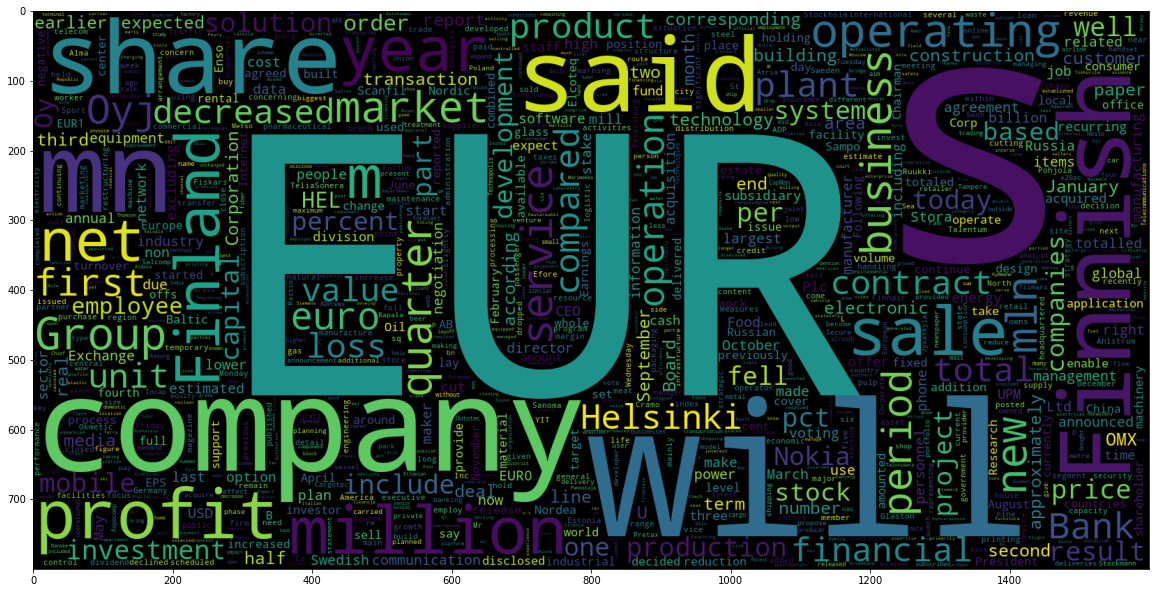

In [179]:
data_pos = data['text'][2846:]
wc = WordCloud(max_words = 1000 , width = 1600 , height = 800,
              collocations=False).generate(" ".join(data_pos))
plt.figure(figsize = (20,20))
plt.imshow(wc)

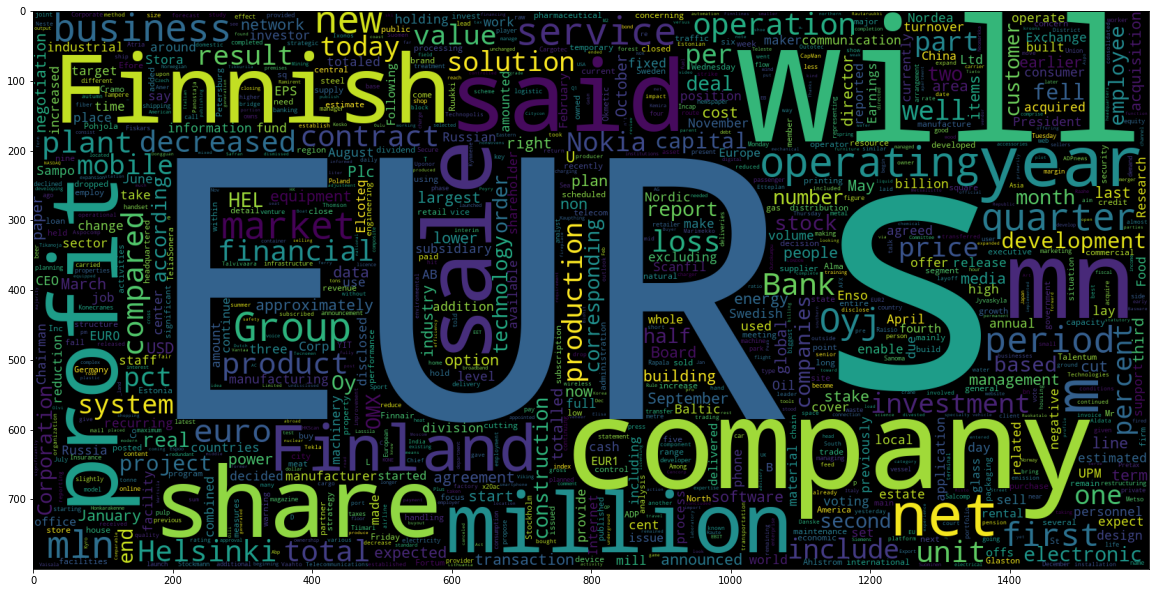

In [180]:
data_neutral = data['text'][2846:]
wc = WordCloud(max_words = 1000 , width = 1600 , height = 800,
              collocations=False).generate(" ".join(data_neutral))
plt.figure(figsize = (20,20))
plt.imshow(wc)

### Splitting our data into Train and Test Subset

In [181]:
# Separating the 95% data for training data and 5% for testing data
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.05, random_state =26105111)

### Fit the TF-IDF Vectorizer

In [182]:
# Term frequency-inverse document frequency is a text vectorizer that transforms the text into a usable vector.
# The term frequency is the number of occurrences of a specific term in a document. Term frequency indicates how important a specific term in a document. 
# Term frequency represents every text from the data as a matrix whose rows are the number of documents and columns are the number of distinct terms throughout 
# all documents.
# Document frequency is the number of documents containing a specific term. Document frequency indicates how common the term is. 
# Inverse document frequency (IDF) is the weight of a term, it aims to reduce the weight of a term if the term’s occurrences are scattered throughout all the documents.

vectoriser = TfidfVectorizer(ngram_range=(1,2), max_features=500000) #  n-gram is an arrangement of n words; ngram_range=(1,2) indicates unigrams and bigrams
vectoriser.fit(X_train)
print('No. of feature_words: ', len(vectoriser.get_feature_names()))

No. of feature_words:  56596


c:\Users\Diya\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


### Transform the data using TF-IDF Vectorizer

In [183]:
X_train = vectoriser.transform(X_train)
X_test  = vectoriser.transform(X_test)

### Function For Model Evaluation

In [184]:
def model_Evaluate(model):

  # Predict values for Test dataset
  y_pred = model.predict(X_test)

  # Print the evaluation metrics for the dataset.
  print(classification_report(y_test, y_pred))

  # A confusion matrix is a table that is often used to describe the performance of a classification model (or "classifier") on a set of test data for which the true values are known. 
  # The confusion matrix itself is relatively simple to understand, but the related terminology can be confusing.
  # Compute and plot the Confusion matrix
  cf_matrix = confusion_matrix(y_test, y_pred)
  categories = ['negative','positive', 'neutral']
  # group_names = ['True Neg','False Pos', 'False Neg','True Pos']
  # group_percentages = ['{0:.2%}'.format(value) for value in cf_matrix.flatten() / np.sum(cf_matrix)]
  # labels = [f'{v1}n{v2}' for v1, v2 in zip(group_names,group_percentages)]
  # labels = np.asarray(labels).reshape(2,2)
  sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True,fmt='.2%', cmap='Blues',xticklabels = categories, yticklabels = categories)
  # xticklabels = categories, yticklabels = categories)
  plt.xlabel("Predicted values", fontdict = {'size':14}, labelpad = 10)
  plt.ylabel("Actual values" , fontdict = {'size':14}, labelpad = 10)
  plt.title ("Confusion Matrix", fontdict = {'size':18}, pad = 20)

### Model Building

1. Model-1 - Bernoulli Naive Bayes

c:\Users\Diya\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Diya\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Diya\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        18
           1       0.83      0.28      0.42        67
           2       0.71      0.99      0.83       158

    accuracy                           0.72       243
   macro avg       0.51      0.43      0.42       243
weighted avg       0.69      0.72      0.66       243



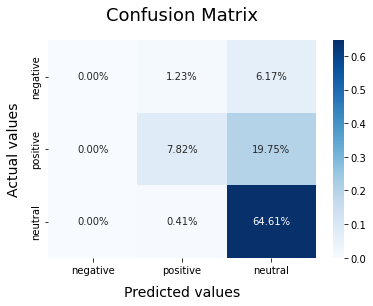

In [185]:
BNBmodel = BernoulliNB()
BNBmodel.fit(X_train, y_train)
model_Evaluate(BNBmodel)
y_pred1 = BNBmodel.predict(X_test)

    Plot the ROC-AUC Curve for model-1

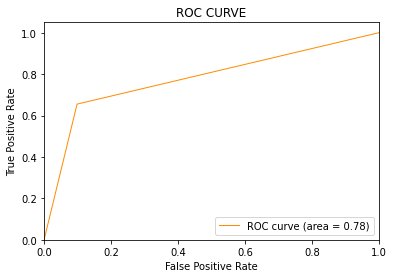

In [ ]:
# AUC - ROC curve is a performance measurement for the classification problems at various threshold settings. ROC is a probability curve and AUC represents the 
# degree or measure of separability. It tells how much the model is capable of distinguishing between classes. Higher the AUC, the better the model is at 
# predicting 0 classes as 0 and 1 classes as 1. By analogy, the Higher the AUC, the better the model is at distinguishing between patients with the disease and 
# no disease.

from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(y_test, y_pred1)
roc_auc = auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=1, label='ROC curve (area = %0.2f)' % roc_auc)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC CURVE')
plt.legend(loc="lower right")

Model-2: SVM (Support Vector Machine)

              precision    recall  f1-score   support

           0       1.00      0.44      0.62        18
           1       0.74      0.63      0.68        67
           2       0.82      0.92      0.87       158

    accuracy                           0.81       243
   macro avg       0.85      0.67      0.72       243
weighted avg       0.81      0.81      0.80       243



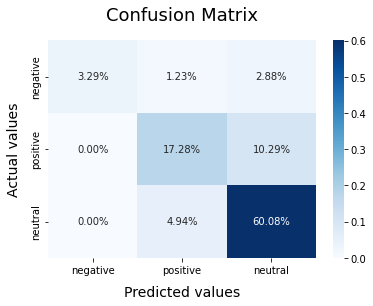

In [186]:
# A support vector machine (SVM) is a supervised machine learning model that 
# uses classification algorithms for two-group classification problems. 
# After giving an SVM model sets of labeled training data for each category, they're able to categorize new text.
SVCmodel = LinearSVC()
SVCmodel.fit(X_train, y_train)
model_Evaluate(SVCmodel)
y_pred2 = SVCmodel.predict(X_test)

Plot the ROC-AUC Curve for model-2

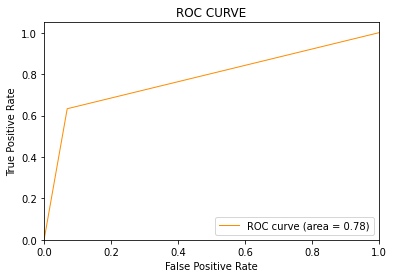

In [ ]:
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(y_test, y_pred2)
roc_auc = auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=1, label='ROC curve (area = %0.2f)' % roc_auc)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC CURVE')
plt.legend(loc="lower right")
plt.show()

Model-3 - Logistic Regression

              precision    recall  f1-score   support

           0       1.00      0.33      0.50        18
           1       0.73      0.55      0.63        67
           2       0.79      0.93      0.85       158

    accuracy                           0.78       243
   macro avg       0.84      0.61      0.66       243
weighted avg       0.79      0.78      0.77       243



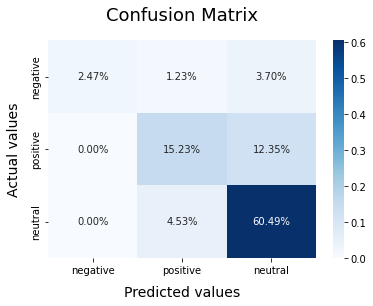

In [187]:
LRmodel = LogisticRegression(C = 2, max_iter = 1000, n_jobs=-1)
LRmodel.fit(X_train, y_train)
model_Evaluate(LRmodel)
y_pred3 = LRmodel.predict(X_test)

Plot the ROC-AUC Curve for model-3

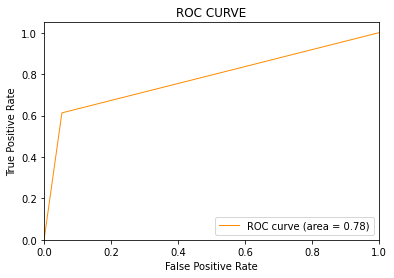

In [ ]:
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(y_test, y_pred3)
roc_auc = auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=1, label='ROC curve (area = %0.2f)' % roc_auc)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC CURVE')
plt.legend(loc="lower right")
plt.show()

### Conclusion

Upon evaluating all the models we can conclude the following details i.e.

Accuracy: As far as the accuracy of the model is concerned Logistic Regression performs better than SVM which in turn performs better than Bernoulli Naive Bayes.

F1-score: The F1 Scores for class 0 and class 1 are :
(a) For class 0: Bernoulli Naive Bayes(accuracy = 0.90) < SVM (accuracy =0.91) < Logistic Regression (accuracy = 0.92)
(b) For class 1: Bernoulli Naive Bayes (accuracy = 0.66) < SVM (accuracy = 0.68) < Logistic Regression (accuracy = 0.69)

AUC Score: All three models have the same ROC-AUC score.

We, therefore, conclude that the Logistic Regression is the best model for the above-given dataset.

In our problem statement, Logistic Regression is following the principle of Occam’s Razor which defines that for a particular problem statement if the data has no assumption, then the simplest model works the best. Since our dataset does not have any assumptions and Logistic Regression is a simple model, therefore the concept holds true for the above-mentioned dataset.